# Analysis of Hospital Appointment No-Shows: Final Report

### Project Goal
To identify the key factors that influence whether a patient will miss their scheduled medical appointment.

### Key Findings 
* **Age is a Major Predictor:** Teenagers and Young Adults (ages 13-35) have the highest no-show rates, approaching 25%. Seniors are the most reliable attendees.
* **Socioeconomic Factors Matter:** Patients with a government scholarship have a significantly higher no-show rate (23.7%) than those without (19.8%).
* **Health Status:** Patients actively managing chronic conditions like Hypertension or Diabetes are slightly *more* likely to attend their appointments.
* **SMS Reminders:** The data shows a surprising correlation where patients who received an SMS were *more* likely to be no-shows, suggesting the system may be targeting high-risk appointments or requires further investigation.

**Dataset Source:** [Kaggle - Medical Appointment No Shows](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

In [32]:
# --- 0. SETUP: IMPORT LIBRARIES ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# --- 1. DATA LOADING AND PREPARATION ---

# Load the dataset
df = pd.read_csv('KaggleV2-May-2016.csv')

# --- DATA CLEANING ---
# Rename columns for clarity
df.rename(columns={
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap',
    'No-show': 'NoShow',
}, inplace=True)

# Correct data types
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Remove invalid data (negative age)
df = df[df['Age'] >= 0]

# Handle duplicates (though this dataset has none)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

# --- FEATURE ENGINEERING ---
# Create the 'NoShow_numeric' column needed for calculations
df['NoShow_numeric'] = df['NoShow'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create the 'AgeGroup' column needed for analysis
age_bins = [0, 12, 18, 35, 60, 120]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

print("\nData successfully loaded and prepared.")
df.head()

Number of duplicate rows found: 0

Data successfully loaded and prepared.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,NoShow_numeric,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Senior
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Senior
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Adult


## The Overall Picture: Attendance & Patient Demographics
We start by looking at the dataset's high-level characteristics. First, what is the overall no-show rate? Second, who are the patients?

C:\Users\Jason\AppData\Local\Temp\ipykernel_11228\3316230732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NoShow', data=df, palette=['#5cb85c', '#d9534f'])


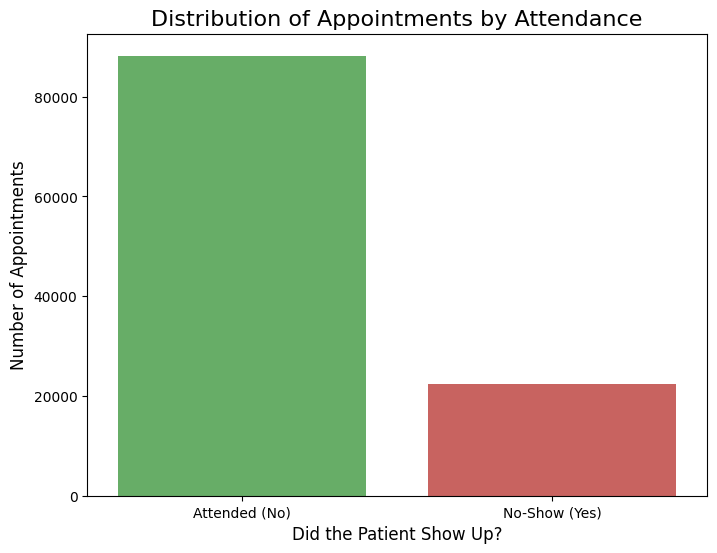

In [34]:
# --- Chart 1: No-Show Distribution ---

plt.figure(figsize=(8, 6))
sns.countplot(x='NoShow', data=df, palette=['#5cb85c', '#d9534f'])
plt.title('Distribution of Appointments by Attendance', fontsize=16)
plt.xlabel('Did the Patient Show Up?', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.xticks([0, 1], ['Attended (No)', 'No-Show (Yes)'])
plt.show()

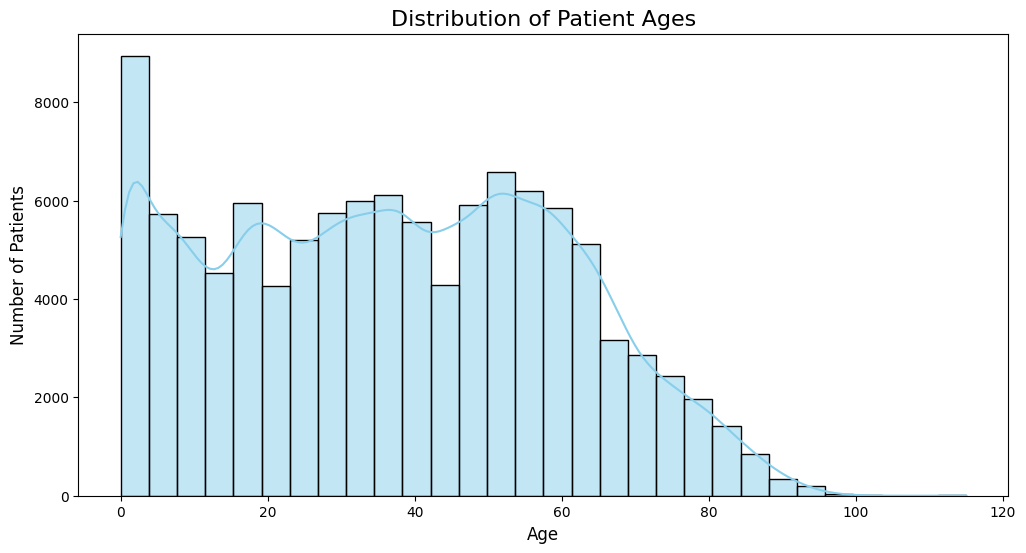

In [35]:
# --- Chart 2: Patient Age Distribution ---

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Patient Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()

## Deeper Analysis: Key Factors in No-Shows
Now we'll investigate how different factors correlate with the no-show rate.

C:\Users\Jason\AppData\Local\Temp\ipykernel_11228\838903549.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_no_show_rate = df.groupby('AgeGroup')['NoShow_numeric'].mean() * 100
C:\Users\Jason\AppData\Local\Temp\ipykernel_11228\838903549.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_no_show_rate.index, y=age_no_show_rate.values, palette='viridis')


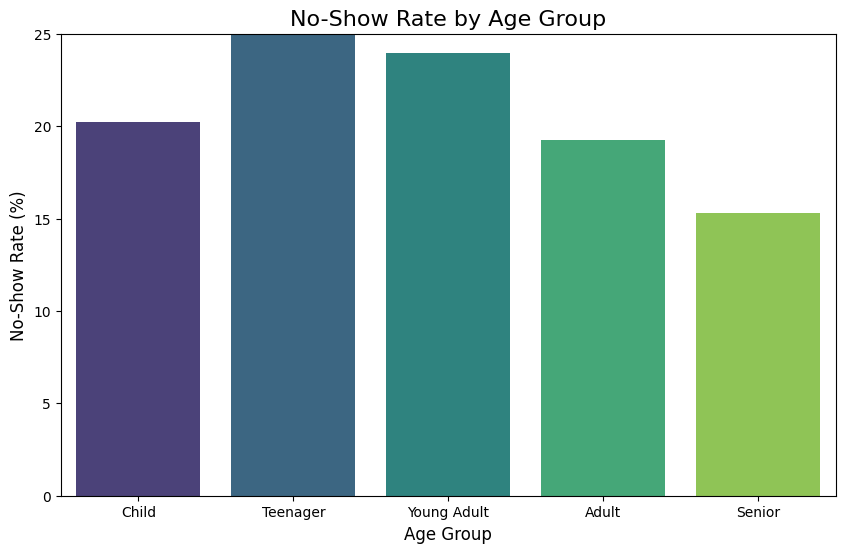

In [36]:
# --- Chart 3: No-Show Rate by Age Group ---

age_no_show_rate = df.groupby('AgeGroup')['NoShow_numeric'].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=age_no_show_rate.index, y=age_no_show_rate.values, palette='viridis')
plt.title('No-Show Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('No-Show Rate (%)', fontsize=12)
plt.ylim(0, 25)
plt.show()

### Interpretation: Age Group
The analysis reveals a clear relationship between age and appointment attendance. **Teenagers** and **Young Adults** have the highest no-show rates, both approaching 25%, while **Seniors** are the most reliable group with the lowest rate at approximately 15%.

C:\Users\Jason\AppData\Local\Temp\ipykernel_11228\1914895136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hypertension_rate.index, y=hypertension_rate.values, palette='Oranges', ax=ax1)
C:\Users\Jason\AppData\Local\Temp\ipykernel_11228\1914895136.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['No', 'Yes'])
C:\Users\Jason\AppData\Local\Temp\ipykernel_11228\1914895136.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diabetes_rate.index, y=diabetes_rate.values, palette='Blues', ax=ax2)
C:\Users\Jason\AppData\Local\Temp\ipykernel_11228\1914895136.py:18: UserWarning: set

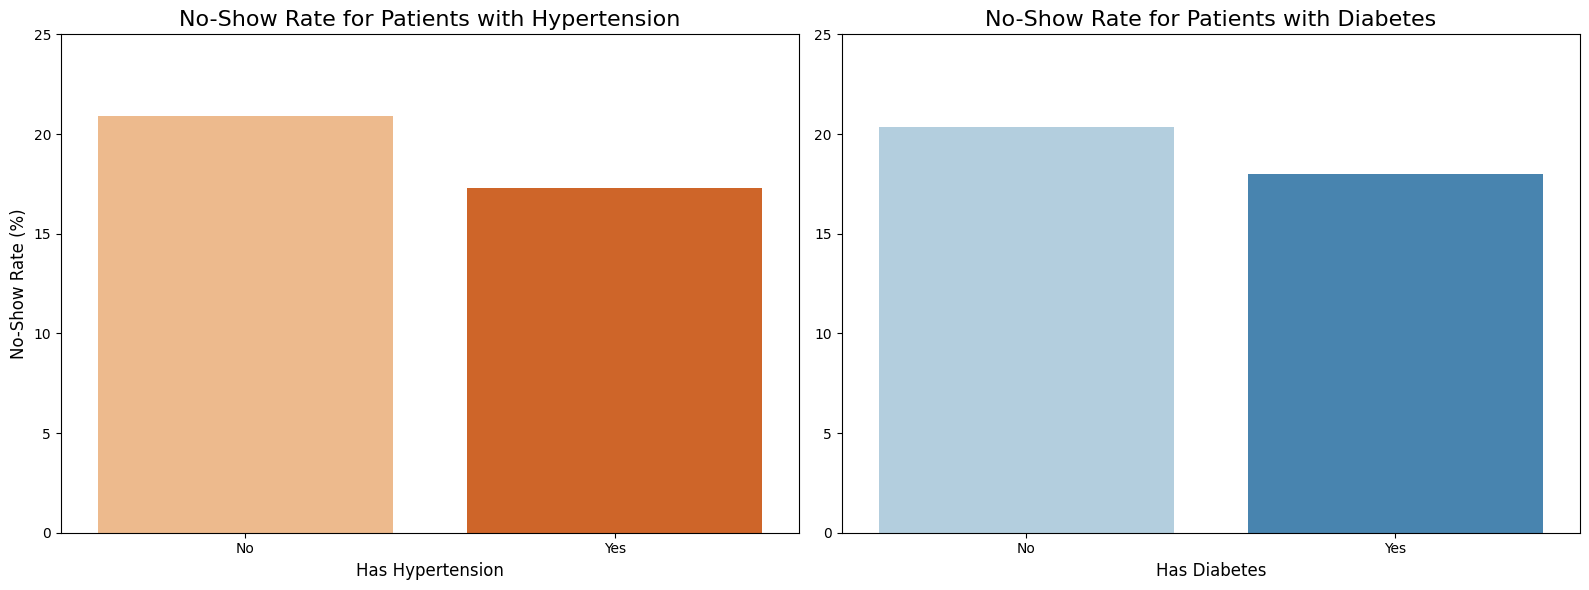

In [37]:
# --- Chart 4: No-Show Rate by Chronic Condition ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Plot 1: Hypertension
hypertension_rate = df.groupby('Hypertension')['NoShow_numeric'].mean() * 100
sns.barplot(x=hypertension_rate.index, y=hypertension_rate.values, palette='Oranges', ax=ax1)
ax1.set_title('No-Show Rate for Patients with Hypertension', fontsize=16)
ax1.set_xlabel('Has Hypertension', fontsize=12)
ax1.set_ylabel('No-Show Rate (%)', fontsize=12)
ax1.set_xticklabels(['No', 'Yes'])
ax1.set_ylim(0, 25)
# Plot 2: Diabetes
diabetes_rate = df.groupby('Diabetes')['NoShow_numeric'].mean() * 100
sns.barplot(x=diabetes_rate.index, y=diabetes_rate.values, palette='Blues', ax=ax2)
ax2.set_title('No-Show Rate for Patients with Diabetes', fontsize=16)
ax2.set_xlabel('Has Diabetes', fontsize=12)
ax2.set_ylabel('')
ax2.set_xticklabels(['No', 'Yes'])
ax2.set_ylim(0, 25)
plt.tight_layout()
plt.show()

### Interpretation: Chronic Conditions
The data shows that patients with chronic conditions like hypertension or diabetes have a slightly **lower no-show rate** than the general patient population. A possible explanation is that patients actively managing a long-term condition are more likely to prioritize their medical appointments.

C:\Users\Jason\AppData\Local\Temp\ipykernel_11228\2525945033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scholarship_rate.index, y=scholarship_rate.values, palette='plasma')


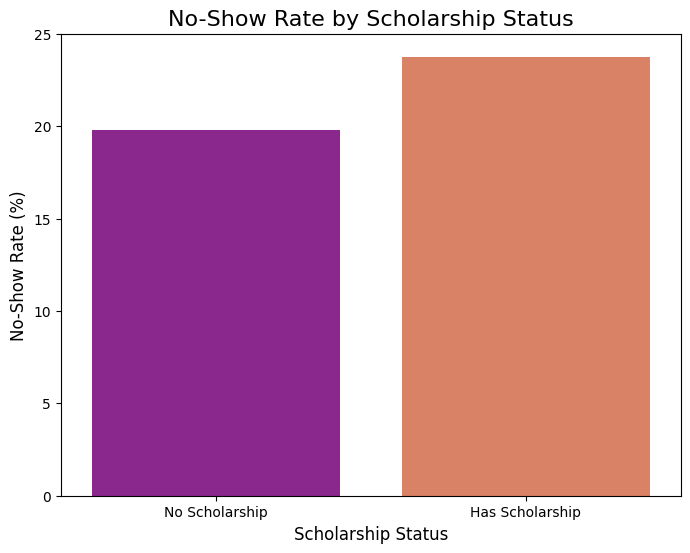

In [38]:
# --- Chart 5: No-Show Rate by Scholarship Status ---

scholarship_rate = df.groupby('Scholarship')['NoShow_numeric'].mean() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=scholarship_rate.index, y=scholarship_rate.values, palette='plasma')
plt.title('No-Show Rate by Scholarship Status', fontsize=16)
plt.ylabel('No-Show Rate (%)', fontsize=12)
plt.xlabel('Scholarship Status', fontsize=12)
plt.xticks([0, 1], ['No Scholarship', 'Has Scholarship'])
plt.ylim(0, 25)
plt.show()

### Interpretation: Scholarship Status
The data shows that patients who are part of the scholarship program have a **noticeably higher no-show rate (23.7%)** compared to those without a scholarship (19.8%), suggesting socioeconomic factors may play a role in appointment attendance.

## Conclusion & Recommendations

Our analysis confirms that several key demographic and logistical factors, rather than a single cause, contribute to appointment no-shows. The primary indicators of a high no-show risk are the patient's age and socioeconomic status.

Based on these findings, we recommend the following actions:

1.  **Target High-Risk Age Groups:** Develop targeted reminder campaigns for **teenagers and young adults (13-35)**. This could involve different messaging or communication channels than those used for other age groups.
2.  **Investigate the SMS System:** The counter-intuitive results for SMS reminders warrant a deeper investigation. The hospital should analyze if the SMS system is truly effective or if it's merely correlated with high-risk appointments that need a different kind of intervention.
3.  **Leverage Reliable Groups:** Since **seniors and patients managing chronic conditions** are highly reliable, the current reminder system is likely sufficient for them, allowing resources to be focused on higher-risk populations.